# Import Data and pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib.patches import Polygon

from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import openpyxl
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef, classification_report

import pandas as pd
import numpy as np
from scipy import stats
from rapidfuzz import fuzz

from pyod.models.knn import KNN
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)




def load_and_clean_data(sheet_name):

    df = pd.read_excel('5-3tillApril.xlsb', sheet_name=sheet_name)

    df = df.dropna(axis=0, how='all')
    df = df.dropna(axis=1, how='all')
    rows_to_remove = [0]
    df = df.drop(df.index[rows_to_remove])
    df.columns = df.iloc[1]
    df = df.drop(df.index[1])
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])


    '''
    
    
    A part of this code is hidden due to confidentiality reasons
    
    
    '''
    df_selected.rename(columns=column_rename_map, inplace=True)
    # Remove rows with any zero values
    df_selected = df_selected[(df_selected != 0).all(axis=1)]

    # Drop rows with any NaN values
    df_selected = df_selected.dropna(axis=0, how="any")
    df_selected = df_selected.dropna(how='all')
    
    return df_selected

df_2023 = load_and_clean_data('2023B Fırın Renk Fiili')
df_2024 = load_and_clean_data('2024B Fırın Renk Fiili')
df_2025 = load_and_clean_data('2025B Fırın Renk Fiili')
df_combined = pd.concat([df_2023, df_2024, df_2025], ignore_index=True)


print(len(df_combined))



features_removed = ['Date']  

df_combined1= df_combined.drop(columns= features_removed)

df_selected=df_combined1

print(len(df_selected))
print(len(df_combined1))
print(len(df_2023))
print(len(df_2024))
print(len(df_2025))





1455
1455
1455
293
916
246


In [2]:

df_selected.head()
df=df_selected

#converting dtype object to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass  # leave as-is if it can't be converted



# Exact Duplicate Rows
duplicates = df[df.duplicated()]

partial_duplicates = df[df.duplicated(subset=['a', 'b'])]

numeric_cols = df.select_dtypes(include=np.number).columns


outliers = pd.DataFrame()
for col in numeric_cols:
    z = np.abs(stats.zscore(df[col].dropna()))
    outliers[col] = (z > 3)

outliers.sum()
zero_var_cols = [col for col in df.columns if df[col].nunique() == 1]

low_info_cols = [col for col in df.columns if (df[col].nunique() / len(df)) < 0.05]



corr_matrix = df.corr().abs()
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                   for col1 in numeric_cols 
                   for col2 in numeric_cols 
                   if col1 != col2 and corr_matrix.loc[col1, col2] > 0.99]




model = KNN()
model.fit(df[numeric_cols].dropna())

outlier_scores = model.decision_scores_
outliers_detected = np.where(outlier_scores > np.percentile(outlier_scores, 94))[0]



outlier_rows = df.iloc[outliers_detected]

df_clean = df.drop(index=outliers_detected)



df_selected=df_clean

threshold = 1e-2  # Define how close to zero you want to filter out

# Keep only rows where both a and b are outside the small range around zero
df_filtered = df_selected[(df_selected['a'].abs() >= threshold) & (df_selected['b'].abs() >= threshold)]
df_clean = df_filtered.reset_index(drop=True)


# lagging 

In [3]:
def create_lagged_features_iteratively(df, features_to_lag, num_lags):
    """
    Create lagged features for specified columns iteratively.
    
    Parameters:
        df (pd.DataFrame): Original DataFrame.
        features_to_lag (list): List of features to lag iteratively.
        num_lags (int): Number of lagged periods.
        
    Returns:
        pd.DataFrame: Final DataFrame after applying lagging iteratively to all specified features.
    """
    current_df = df.copy()  # Start with the original DataFrame
    
    for feature in features_to_lag:
        # Create lagged feature for the current column
        for lag in range(1, num_lags + 1):
            current_df[f'{feature}_lag_{lag}'] = current_df[feature].shift(lag)
        
        # Remove rows with NaN values created by shifting
        current_df = current_df.dropna().reset_index(drop=True)
    
    return current_df



features_to_lag= [     '''
    
    
                A part of this code is hidden due to confidentiality reasons
    
    
                    ''']
num_lags = 1

# Perform iterative lagging
final_lagged_df = create_lagged_features_iteratively(df_clean, features_to_lag, num_lags)



# Test set 1

Classifier accuracy on Train: 1.000
Classifier accuracy on Validation: 0.823
Confusion Matrix (Validation):
[[ 14   0   0   0]
 [  1  38   1   1]
 [  6  24 137  10]
 [  0   0   0  11]]
Classifier accuracy on Test: 0.667

Test Predictions Distribution: 2    3
3    1
4    2
Name: count, dtype: int64
Test True Distribution: quadrant
2    3
3    3
Name: count, dtype: int64
Classification Report (Test):
              precision    recall  f1-score   support

           2      1.000     1.000     1.000         3
           3      1.000     0.333     0.500         3
           4      0.000     0.000     0.000         0

    accuracy                          0.667         6
   macro avg      0.667     0.444     0.500         6
weighted avg      1.000     0.667     0.750         6

Training and evaluating model: RandomForest1 (single model, no quadrant split)


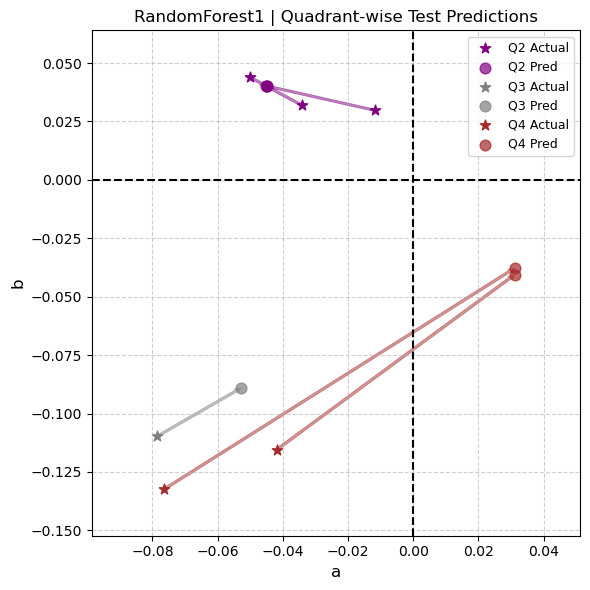

Training and evaluating model: RandomForest2 (single model, no quadrant split)


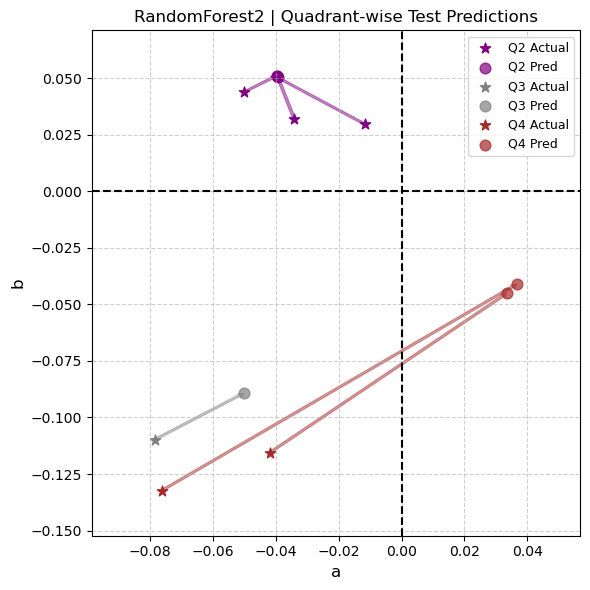

Training and evaluating model: RandomForest3 (single model, no quadrant split)


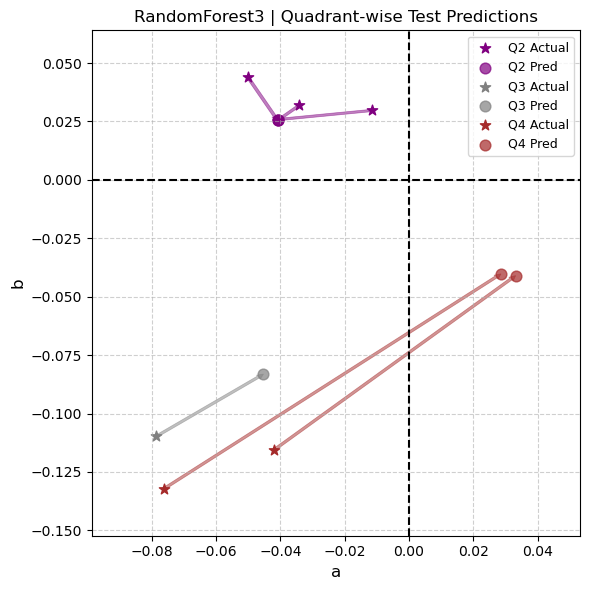

Training and evaluating model: XGBoost (single model, no quadrant split)


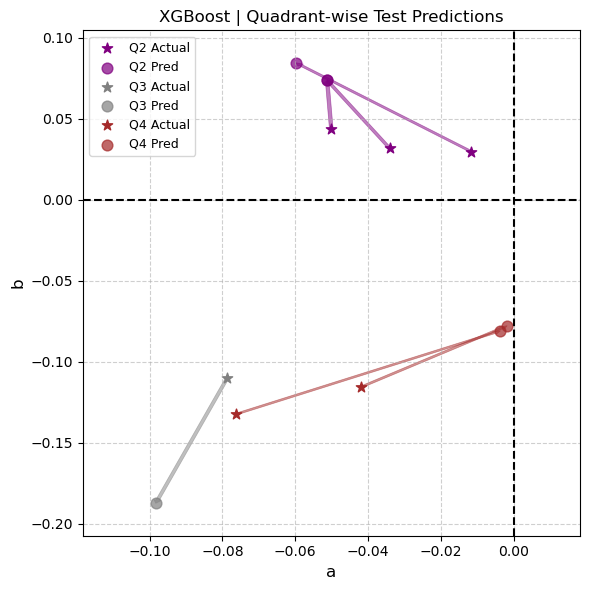

Training and evaluating model: XGBoost1 (single model, no quadrant split)


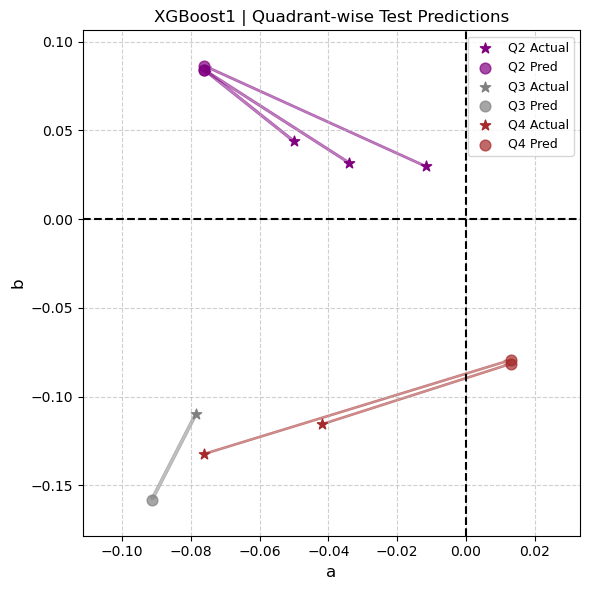

Training and evaluating model: GradientBoost (single model, no quadrant split)


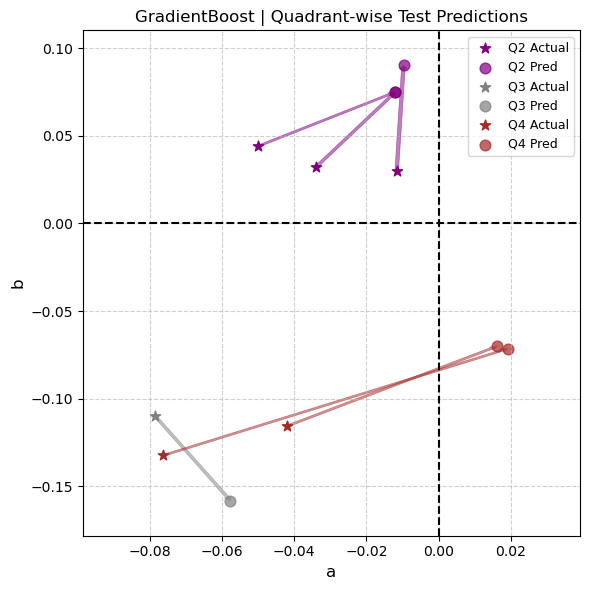

Training and evaluating model: GradientBoost1 (single model, no quadrant split)


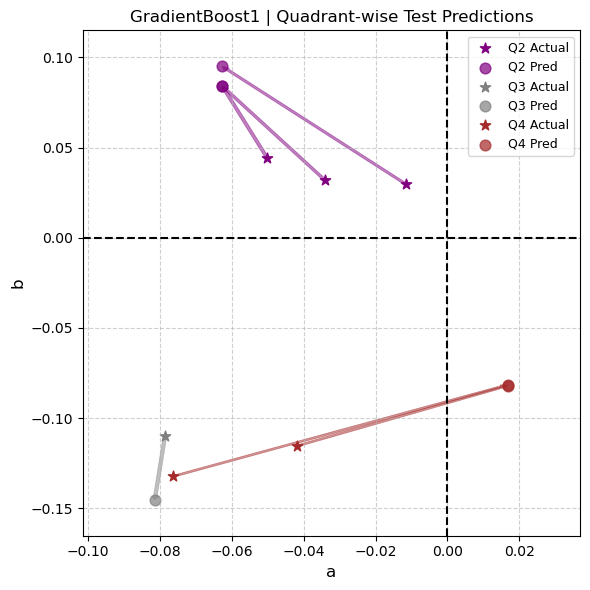

Training and evaluating model: RandomForest_Tuned (single model, no quadrant split)


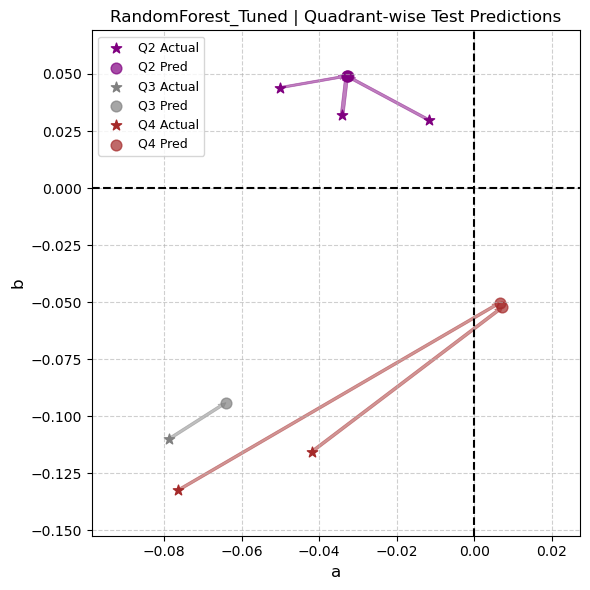

Training and evaluating model: XGBoost_Tuned (single model, no quadrant split)


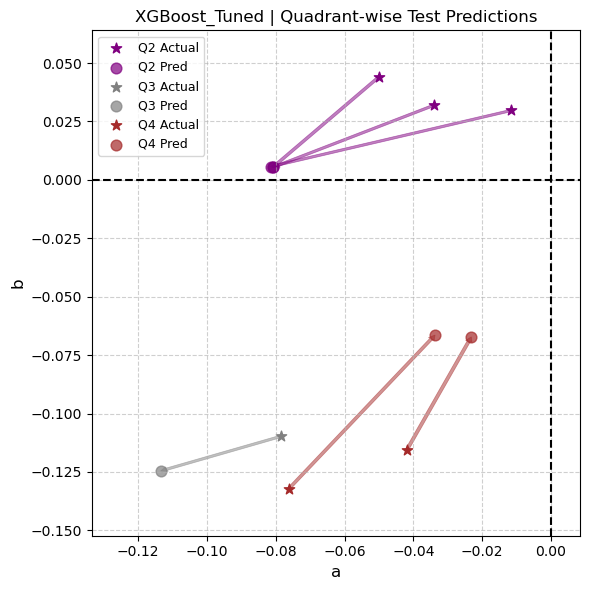

Training and evaluating model: XGBoost_Improved (single model, no quadrant split)


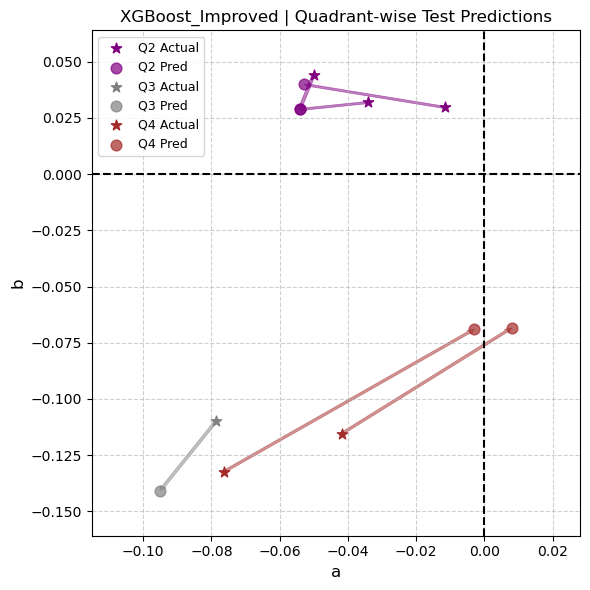

Training and evaluating model: CatBoost_Tuned (single model, no quadrant split)


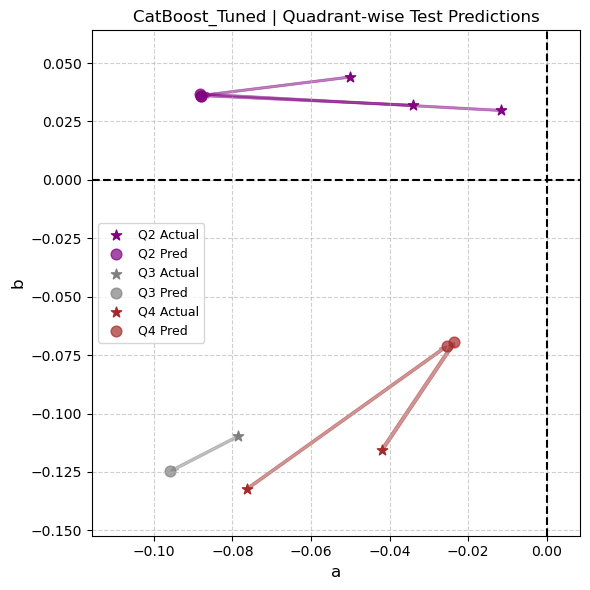

Training and evaluating model: CatBoost_Improved (single model, no quadrant split)


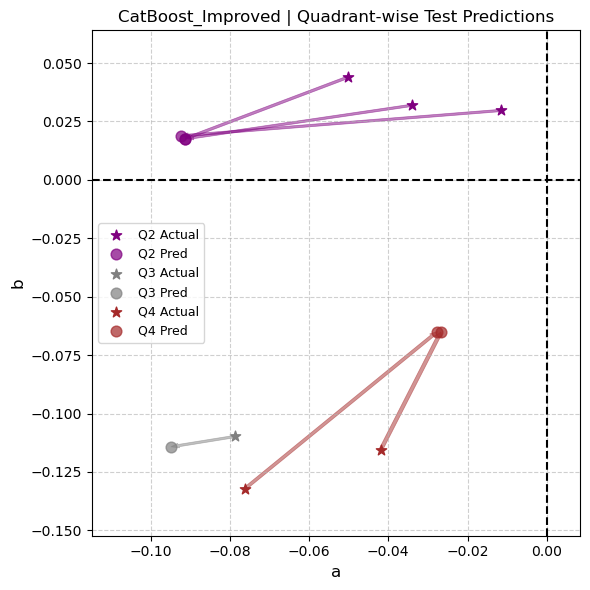

Training and evaluating model: GradientBoost_Tuned (single model, no quadrant split)


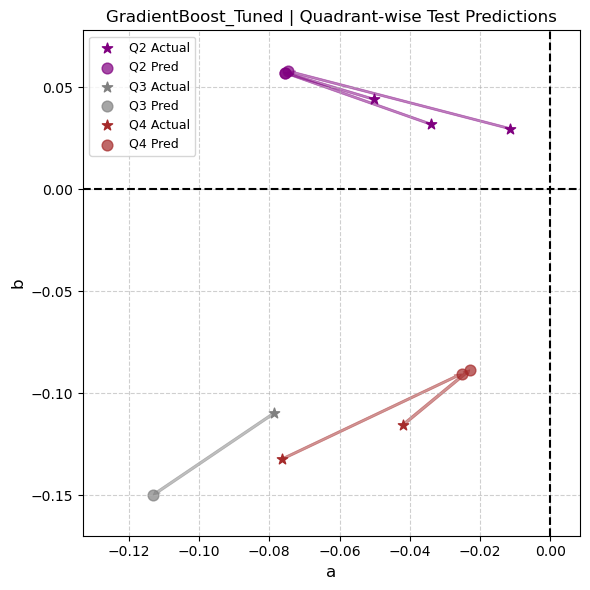

Training and evaluating model: Lasso_Tuned (single model, no quadrant split)


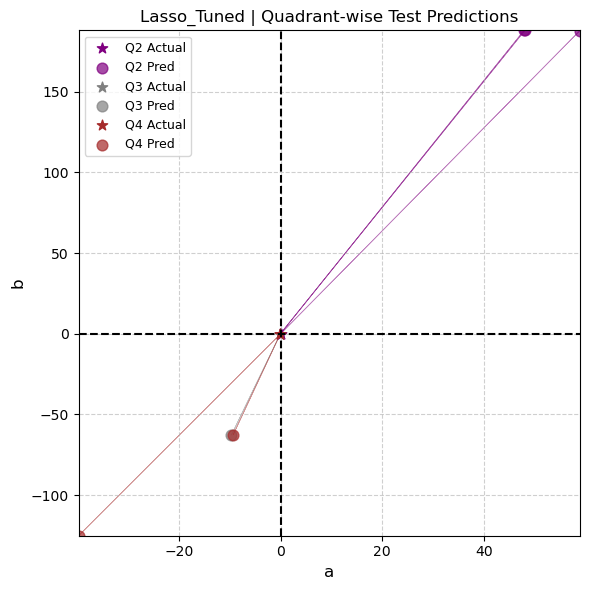

Training and evaluating model: Ridge_Tuned (single model, no quadrant split)


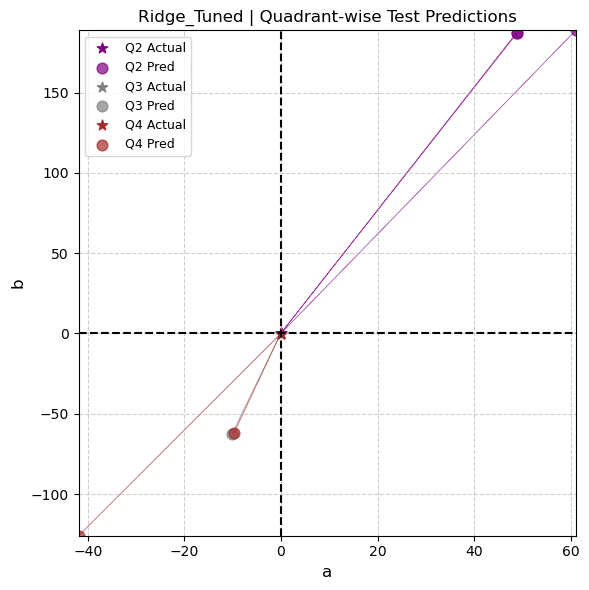

             Model Quadrant Target       Split         MAE           MSE  \
0    RandomForest1      All      a       Train    0.022435      0.000839   
1    RandomForest1      All      a  Validation    0.045191      0.003664   
2    RandomForest1      All      b       Train    0.019273      0.000661   
3    RandomForest1      All      b  Validation    0.035746      0.002258   
4    RandomForest1        2      a        Test    0.016542      0.000425   
..             ...      ...    ...         ...         ...           ...   
145    Ridge_Tuned        2      b        Test  187.741906  35247.495935   
146    Ridge_Tuned        3      a        Test   10.042197    100.845724   
147    Ridge_Tuned        3      b        Test   62.316563   3883.354070   
148    Ridge_Tuned        4      a        Test   25.778165    922.942242   
149    Ridge_Tuned        4      b        Test   93.975256   9845.209417   

               R2          Bias  
0    8.925307e-01  3.430143e-18  
1    5.909065e-01  

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import clone
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt






df_selected= final_lagged_df
# === 1. Setup: targets and features ===
target_columns = ['a', 'b']
features_removed = [
                '''
    
    
                A part of this code is hidden due to confidentiality reasons
    
    
                '''
]

# === 2. Assign quadrants ===
def assign_quadrant(a, b):
    if a >= 0 and b >= 0:
        return 1
    elif a < 0 and b >= 0:
        return 2
    elif a < 0 and b < 0:
        return 3
    else:
        return 4

y_full = df_selected[target_columns].copy()
y_full['quadrant'] = y_full.apply(lambda row: assign_quadrant(row['a'], row['b']), axis=1)

# === 3. Split test set indices (last 6 samples per quadrant) ===
test_indices = []
for q in [2, 3]:
    q_indices = y_full[y_full['quadrant'] == q].index
    q_test_indices = q_indices[-13:-10]
    test_indices.extend(q_test_indices)

train_val_indices = df_selected.index.difference(test_indices)

# === 4. Prepare features ===
X_all = df_selected.drop(columns=target_columns + features_removed)

# === 5. Scale features and targets ===
scaler_X = RobustScaler()
scaler_y = RobustScaler()

scaler_X.fit(X_all.loc[train_val_indices])
X_train_val_scaled = pd.DataFrame(scaler_X.transform(X_all.loc[train_val_indices]), columns=X_all.columns, index=train_val_indices)
X_test_scaled = pd.DataFrame(scaler_X.transform(X_all.loc[test_indices]), columns=X_all.columns, index=test_indices)

scaler_y.fit(y_full.loc[train_val_indices, target_columns])
y_train_val_scaled = pd.DataFrame(scaler_y.transform(y_full.loc[train_val_indices, target_columns]), columns=target_columns, index=train_val_indices)
y_test_scaled = pd.DataFrame(scaler_y.transform(y_full.loc[test_indices, target_columns]), columns=target_columns, index=test_indices)

# === 6. Outlier correction ===
def mad(series):
    return np.median(np.abs(series - np.median(series)))

thresholds = {1: 2.5, 2: 2.5, 3: 3.5, 4: 3.5}
outlier_log = {quad: {} for quad in thresholds.keys()}

corrected_X_train_val = X_train_val_scaled.copy()

for quad, threshold in thresholds.items():
    quad_indices = y_full.loc[train_val_indices][y_full.loc[train_val_indices]['quadrant'] == quad].index
    for col in X_train_val_scaled.columns:
        col_data = X_train_val_scaled.loc[quad_indices, col]
        col_median = np.median(col_data)
        col_mad = mad(col_data)
        if col_mad == 0:
            outlier_log[quad][col] = 0
            continue
        z_scores = np.abs((col_data - col_median) / col_mad)
        outlier_indices = col_data[z_scores > threshold].index
        corrected_X_train_val.loc[outlier_indices, col] = col_median
        outlier_log[quad][col] = len(outlier_indices)

# === 7. Train/Val Split ===
quadrants_train_val = y_full.loc[train_val_indices, 'quadrant'].reset_index(drop=True)

X_train, X_val, y_train, y_val, q_train, q_val = train_test_split(
    corrected_X_train_val, y_train_val_scaled, quadrants_train_val, test_size=0.2, random_state=42, stratify=quadrants_train_val
)


# === 11. Create quadrant-specific test sets (from safely scaled test set) ===
quadrant_test_sets = {}
for q in [ 2, 3]:
    q_test_indices = y_full.loc[test_indices][y_full.loc[test_indices]['quadrant'] == q].index
    quadrant_test_sets[q] = (X_test_scaled.loc[q_test_indices], y_full.loc[q_test_indices, target_columns])


# === 8. Classifier prediction for quadrants (assumed pre-fitted classifier) ===



from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(random_state=42, n_estimators=200)

clf.fit(X_train, q_train)
q_train_pred = q_train.values
#q_train_pred = clf.predict(X_train)
q_val_pred = clf.predict(X_val)

from sklearn.metrics import accuracy_score, confusion_matrix

train_acc = accuracy_score(q_train, q_train_pred)
val_acc = accuracy_score(q_val, q_val_pred)

print(f"Classifier accuracy on Train: {train_acc:.3f}")
print(f"Classifier accuracy on Validation: {val_acc:.3f}")

# Optional: View confusion matrix for validation predictions
print("Confusion Matrix (Validation):")
print(confusion_matrix(q_val, q_val_pred))



# 7. Add predicted quadrant as feature for train and val sets

X_train_quad_scaled = np.hstack([X_train, q_train_pred.reshape(-1, 1) ])
X_val_quad_scaled = np.hstack([X_val, q_val_pred.reshape(-1, 1) ])




results_per_quadrant = []
# --- Prepare full test set by combining all quadrant test sets ---
X_test_all = pd.concat([quadrant_test_sets[q][0] for q in [2, 3]])
y_test_all = pd.concat([quadrant_test_sets[q][1] for q in [ 2, 3]])

# Scale the full test set features (without the quadrant feature yet)
X_test_all_scaled = scaler_X.transform(X_test_all)

# Predict quadrant labels for full test set
q_test_pred_all = clf.predict(X_test_all_scaled)

# Add predicted quadrant as an extra feature for test set
X_test_all_quad_scaled = np.hstack([X_test_all_scaled, q_test_pred_all.reshape(-1, 1)])

quadrants_test_true = y_full.loc[X_test_all.index, 'quadrant']

test_acc = accuracy_score(quadrants_test_true,q_test_pred_all)
print(f"Classifier accuracy on Test: {test_acc:.3f}")

print("\nTest Predictions Distribution:", pd.Series(q_test_pred_all).value_counts().sort_index())
print("Test True Distribution:", pd.Series(quadrants_test_true).value_counts().sort_index())

from sklearn.metrics import classification_report

print("Classification Report (Test):")
print(classification_report(quadrants_test_true, q_test_pred_all, digits=3))


q_test_pred_all = clf.predict(X_test_scaled)


results_per_quadrant = []



models = {
    'RandomForest1': RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, n_estimators=300, random_state=42),
        '''
    
    
        A part of this code is hidden due to confidentiality reasons
    
    
        '''

}

for model_name, model_base in models.items():
    print(f"Training and evaluating model: {model_name} (single model, no quadrant split)")
    
    model = model_base
    
    if 'sample_weight' in model.fit.__code__.co_varnames:
        model.fit(X_train_quad_scaled, y_train, sample_weight=None)
    else:
        model.fit(X_train_quad_scaled, y_train)
    
    # Predict on entire train and validation sets
    y_train_pred_scaled = model.predict(X_train_quad_scaled)
    y_val_pred_scaled = model.predict(X_val_quad_scaled)
    
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
    y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)
    y_train_true = scaler_y.inverse_transform(y_train)
    y_val_true = scaler_y.inverse_transform(y_val)

    # Compute overall train and validation metrics (not by quadrant)
    for i, target in enumerate(target_columns):
        mae = mean_absolute_error(y_train_true[:, i], y_train_pred[:, i])
        mse = mean_squared_error(y_train_true[:, i], y_train_pred[:, i])
        r2 = r2_score(y_train_true[:, i], y_train_pred[:, i])
        bias = (y_train_pred[:, i] - y_train_true[:, i]).mean()

        results_per_quadrant.append({
            'Model': model_name,
            'Quadrant': 'All',
            'Target': target,
            'Split': 'Train',
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'Bias': bias
        })

        mae = mean_absolute_error(y_val_true[:, i], y_val_pred[:, i])
        mse = mean_squared_error(y_val_true[:, i], y_val_pred[:, i])
        r2 = r2_score(y_val_true[:, i], y_val_pred[:, i])
        bias = (y_val_pred[:, i] - y_val_true[:, i]).mean()

        results_per_quadrant.append({
            'Model': model_name,
            'Quadrant': 'All',
            'Target': target,
            'Split': 'Validation',
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'Bias': bias
        })

    # --- Now use classifier labels to group test samples ---
# --- Now use classifier labels to group test samples ---
    predictions_per_quadrant = {}
    
    for q in [1, 2, 3,4]:
        idx_test_q = np.where(q_test_pred_all == q)[0]
    
        if len(idx_test_q) == 0:
            #print(f"Warning: No test samples predicted in quadrant {q}, skipping test prediction for this quadrant.")
            continue
    
        X_test_q = X_test_all_quad_scaled[idx_test_q]
        y_test_true = y_test_all.iloc[idx_test_q].values
    
        # Predict on test samples (using single model)
        y_test_pred_scaled = model.predict(X_test_q)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
    
        # Save predictions
        predictions_per_quadrant[q] = (y_test_true, y_test_pred)
    
        # Compute test metrics for this quadrant grouping
        for i, target in enumerate(target_columns):
            mae = mean_absolute_error(y_test_true[:, i], y_test_pred[:, i])
            mse = mean_squared_error(y_test_true[:, i], y_test_pred[:, i])
            r2 = r2_score(y_test_true[:, i], y_test_pred[:, i])
            bias = (y_test_pred[:, i] - y_test_true[:, i]).mean()
    
            results_per_quadrant.append({
                'Model': model_name,
                'Quadrant': q,
                'Target': target,
                'Split': 'Test',
                'MAE': mae,
                'MSE': mse,
                'R2': r2,
                'Bias': bias
            })
    
    # Plot test predictions per quadrant for this model
    colors = {
    1: (0 / 255, 0 / 255, 255 / 255),
    2: (128 / 255, 0 / 255, 128 / 255),
    3: (128 / 255, 128 / 255, 128 / 255),
    4: (165 / 255, 42 / 255, 42 / 255)
    }
    
    plt.figure(figsize=(6, 6))  # Smaller, tidier plot
    
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=1.5)
    
    # For adjusting axis limits later
    all_a = []
    all_b = []
    
    for q_label, (y_true_q, y_pred_q) in predictions_per_quadrant.items():
        plt.scatter(y_true_q[:, 0], y_true_q[:, 1], color=colors[q_label], marker='*', s=60, label=f'Q{q_label} Actual')
        plt.scatter(y_pred_q[:, 0], y_pred_q[:, 1], color=colors[q_label], marker='o', s=60, alpha=0.7, label=f'Q{q_label} Pred')
        
        for i in range(len(y_true_q)):
            plt.arrow(
                y_true_q[i, 0], y_true_q[i, 1],
                y_pred_q[i, 0] - y_true_q[i, 0],
                y_pred_q[i, 1] - y_true_q[i, 1],
                head_width=0.002, head_length=0.002,  # smaller arrowhead
                fc=colors[q_label], ec=colors[q_label], alpha=0.5,
                linewidth=0.5,  # thinner arrows
                length_includes_head=True
            )
        
        # Collect all points for axis limits
        all_a.extend(y_true_q[:, 0])
        all_a.extend(y_pred_q[:, 0])
        all_b.extend(y_true_q[:, 1])
        all_b.extend(y_pred_q[:, 1])
    
    # Set axis limits with small padding
    padding = 0.02
    plt.xlim(min(all_a) - padding, max(all_a) + padding)
    plt.ylim(min(all_b) - padding, max(all_b) + padding)
    
    plt.xlabel('a', fontsize=12)
    plt.ylabel('b', fontsize=12)
    plt.title(f'{model_name} | Quadrant-wise Test Predictions')
    plt.legend(fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame(results_per_quadrant)
print(results_df)

# Test set 2

Classifier accuracy on Train: 1.000
Classifier accuracy on Validation: 0.823
Confusion Matrix (Validation):
[[ 14   0   0   0]
 [  0  38   2   1]
 [  6  23 137  11]
 [  0   0   0  11]]
Classifier accuracy on Test: 1.000

Test Predictions Distribution: 2    3
3    3
Name: count, dtype: int64
Test True Distribution: quadrant
2    3
3    3
Name: count, dtype: int64
Classification Report (Test):
              precision    recall  f1-score   support

           2      1.000     1.000     1.000         3
           3      1.000     1.000     1.000         3

    accuracy                          1.000         6
   macro avg      1.000     1.000     1.000         6
weighted avg      1.000     1.000     1.000         6

Training and evaluating model: RandomForest1 (single model, no quadrant split)


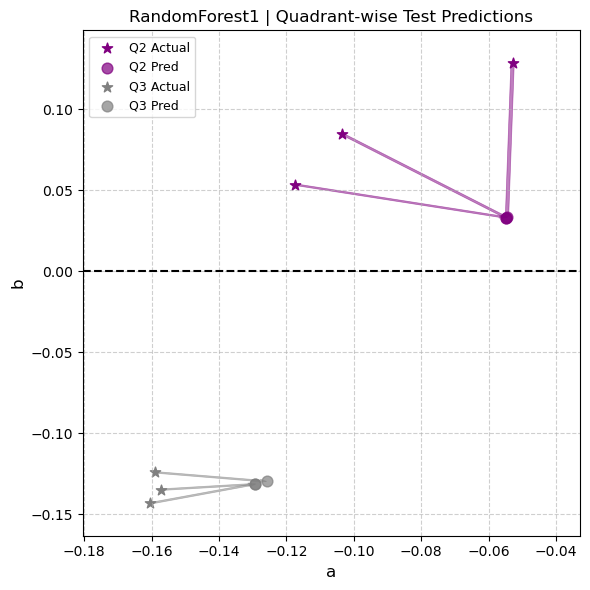

Training and evaluating model: RandomForest2 (single model, no quadrant split)


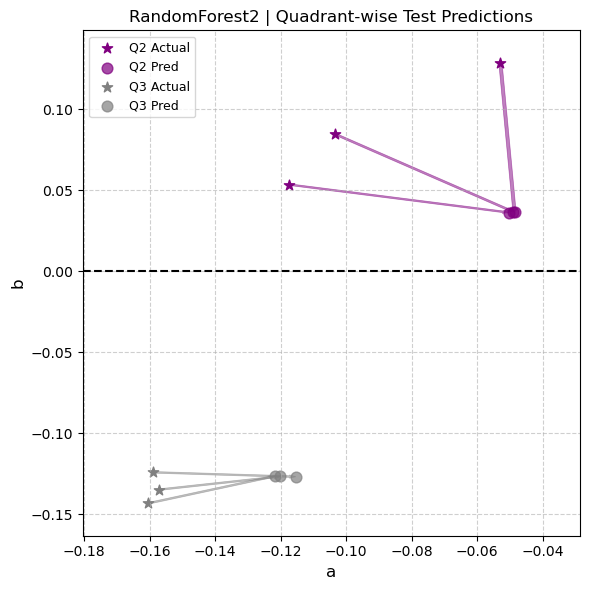

Training and evaluating model: RandomForest3 (single model, no quadrant split)


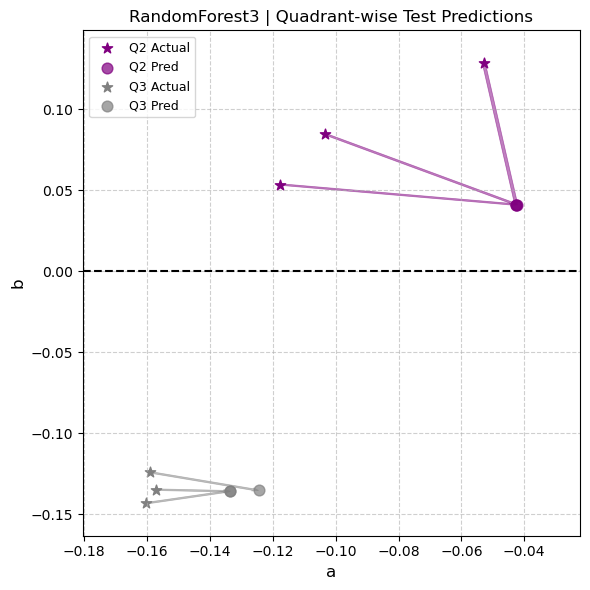

Training and evaluating model: XGBoost (single model, no quadrant split)


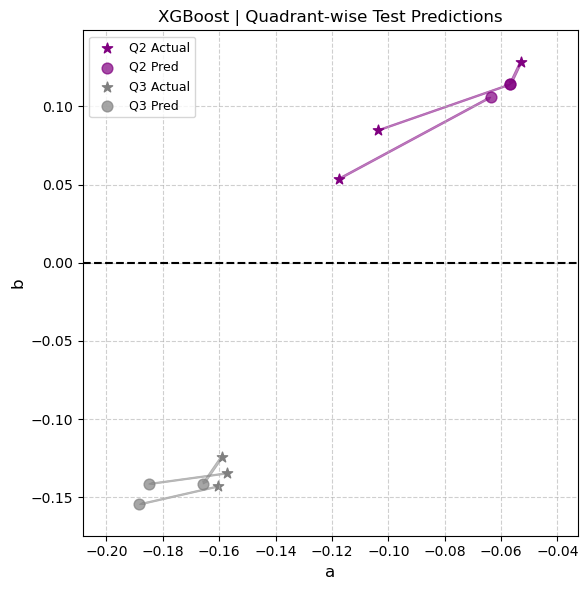

Training and evaluating model: XGBoost1 (single model, no quadrant split)


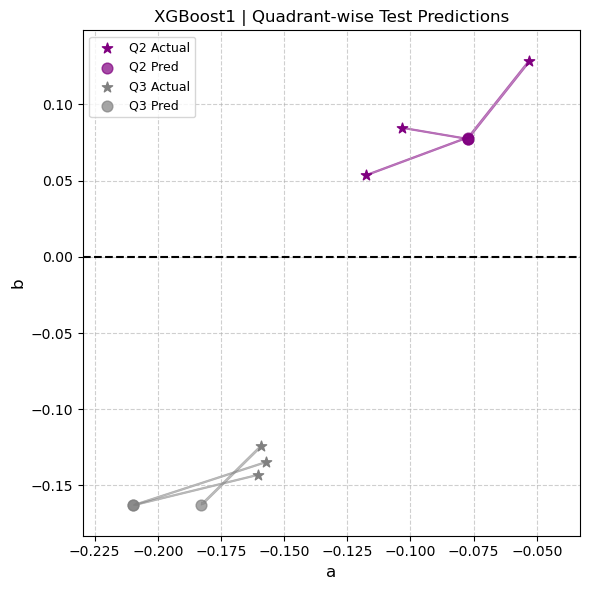

Training and evaluating model: GradientBoost (single model, no quadrant split)


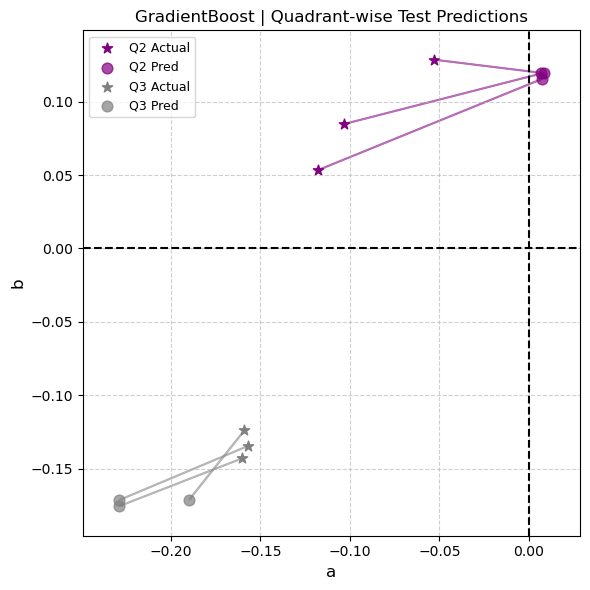

Training and evaluating model: GradientBoost1 (single model, no quadrant split)


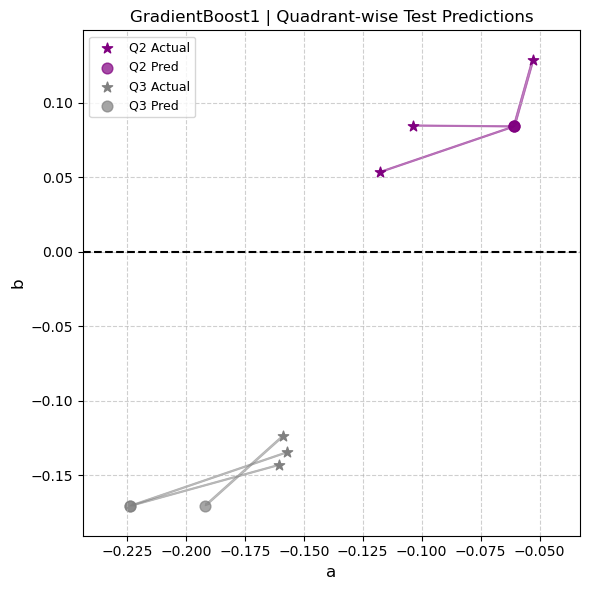

Training and evaluating model: RandomForest_Tuned (single model, no quadrant split)


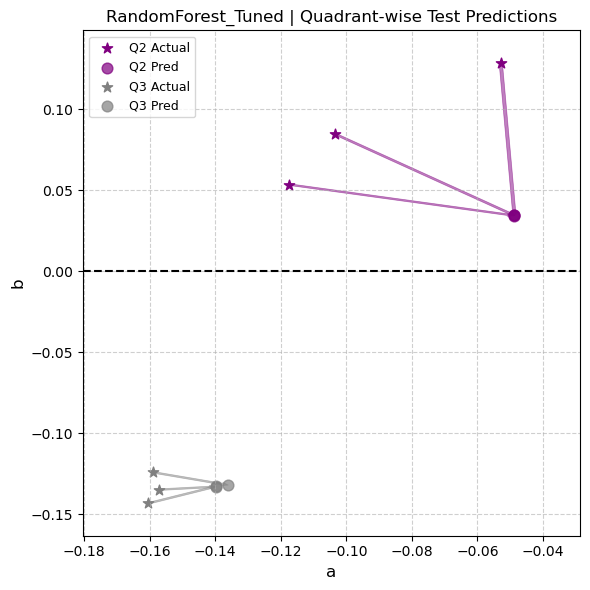

Training and evaluating model: XGBoost_Tuned (single model, no quadrant split)


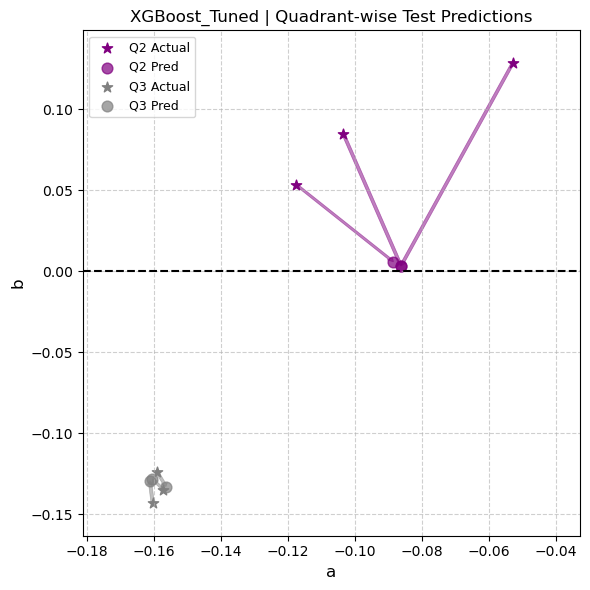

Training and evaluating model: XGBoost_Improved (single model, no quadrant split)


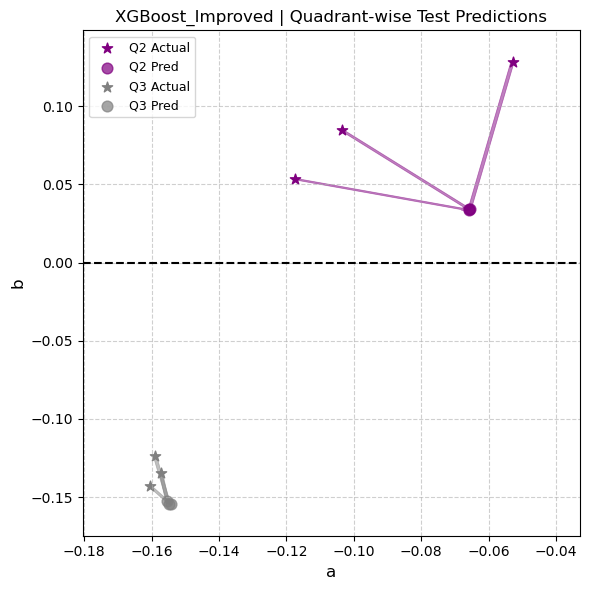

Training and evaluating model: CatBoost_Tuned (single model, no quadrant split)


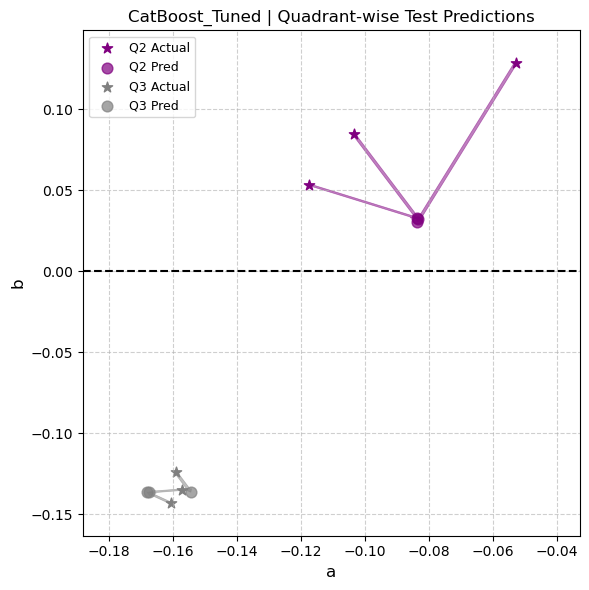

Training and evaluating model: CatBoost_Improved (single model, no quadrant split)


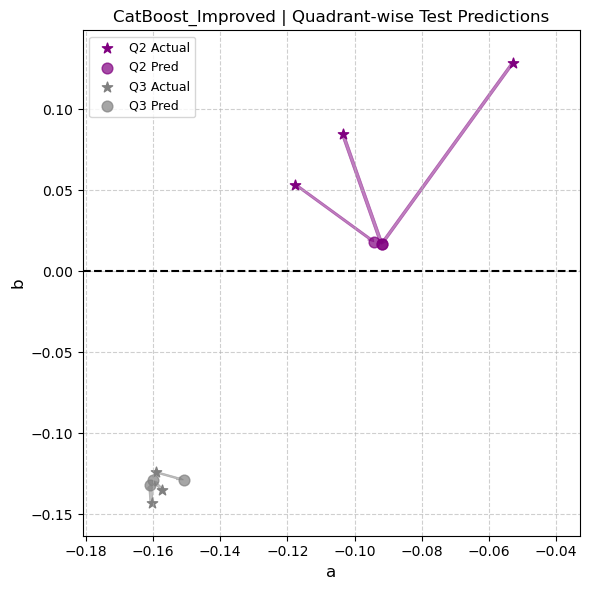

Training and evaluating model: GradientBoost_Tuned (single model, no quadrant split)


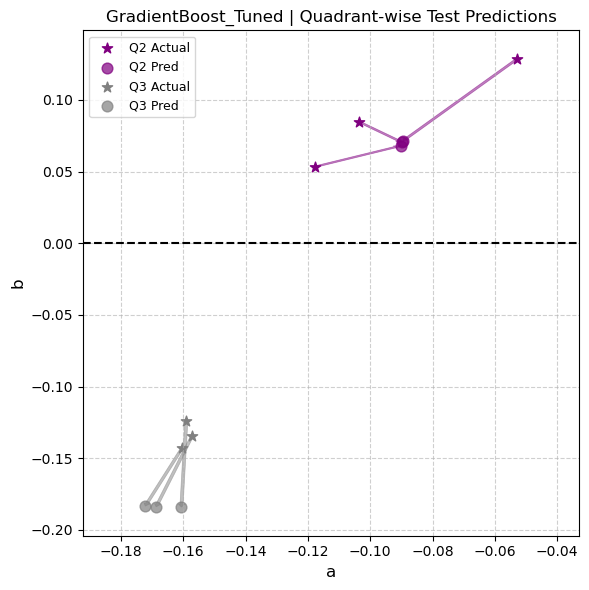

Training and evaluating model: Lasso_Tuned (single model, no quadrant split)


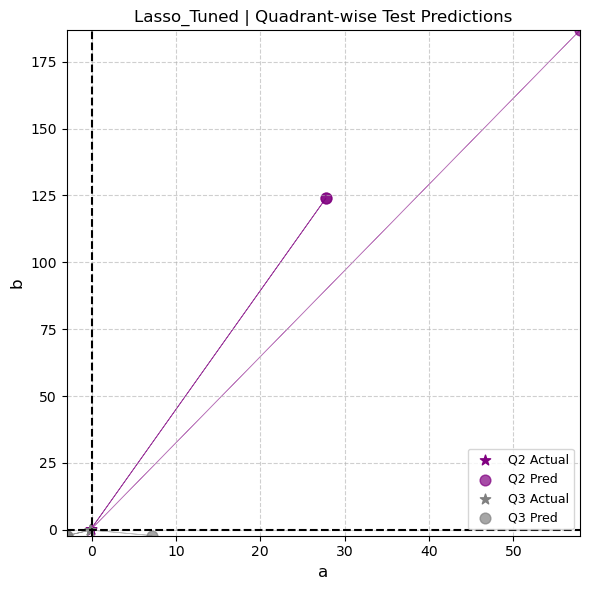

Training and evaluating model: Ridge_Tuned (single model, no quadrant split)


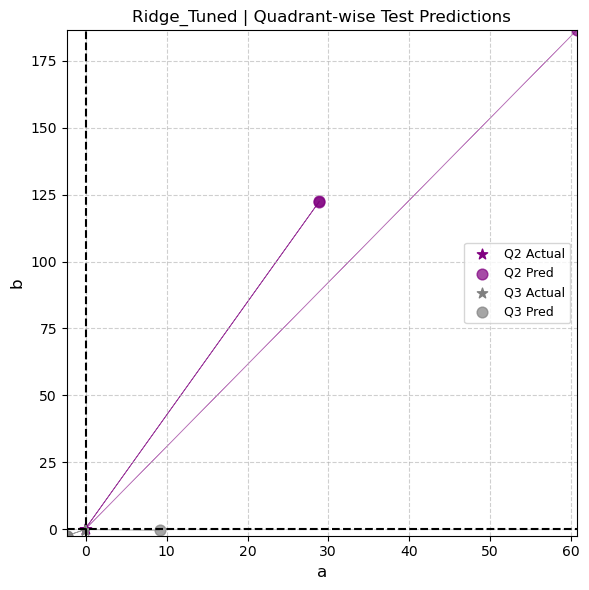

             Model Quadrant Target       Split         MAE           MSE  \
0    RandomForest1      All      a       Train    0.022515      0.000840   
1    RandomForest1      All      a  Validation    0.045014      0.003622   
2    RandomForest1      All      b       Train    0.018922      0.000645   
3    RandomForest1      All      b  Validation    0.036258      0.002389   
4    RandomForest1        2      a        Test    0.037767      0.002111   
..             ...      ...    ...         ...         ...           ...   
115    Ridge_Tuned      All      b  Validation    0.039461      0.002774   
116    Ridge_Tuned        2      a        Test   39.600270   1792.747798   
117    Ridge_Tuned        2      b        Test  143.669696  21545.968501   
118    Ridge_Tuned        3      a        Test    4.544212     31.838904   
119    Ridge_Tuned        3      b        Test    1.561576      3.320144   

               R2          Bias  
0    8.928594e-01 -1.657903e-18  
1    5.931878e-01  

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import clone
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt






df_selected= final_lagged_df
# === 1. Setup: targets and features ===
target_columns = ['a', 'b']
features_removed = [
    'Sodium Sulfate', 'Humidity of the blend', 'Cobalt Oxide', 'K3',
    'Furnace Floor Temperatures 6', 'K2', 'Furnace Floor Temperatures 3',
    'Furnace Floor Temperatures 10', 'K1', 'Internal Pressure Value',
    'Furnace Floor Temperatures 5'
]

# === 2. Assign quadrants ===
def assign_quadrant(a, b):
    if a >= 0 and b >= 0:
        return 1
    elif a < 0 and b >= 0:
        return 2
    elif a < 0 and b < 0:
        return 3
    else:
        return 4

y_full = df_selected[target_columns].copy()
y_full['quadrant'] = y_full.apply(lambda row: assign_quadrant(row['a'], row['b']), axis=1)

# === 3. Split test set indices (last 6 samples per quadrant) ===
test_indices = []
for q in [2, 3]:
    q_indices = y_full[y_full['quadrant'] == q].index
    q_test_indices = q_indices[-43:-40]
    test_indices.extend(q_test_indices)

train_val_indices = df_selected.index.difference(test_indices)

# === 4. Prepare features ===
X_all = df_selected.drop(columns=target_columns + features_removed)

# === 5. Scale features and targets ===
scaler_X = RobustScaler()
scaler_y = RobustScaler()

scaler_X.fit(X_all.loc[train_val_indices])
X_train_val_scaled = pd.DataFrame(scaler_X.transform(X_all.loc[train_val_indices]), columns=X_all.columns, index=train_val_indices)
X_test_scaled = pd.DataFrame(scaler_X.transform(X_all.loc[test_indices]), columns=X_all.columns, index=test_indices)

scaler_y.fit(y_full.loc[train_val_indices, target_columns])
y_train_val_scaled = pd.DataFrame(scaler_y.transform(y_full.loc[train_val_indices, target_columns]), columns=target_columns, index=train_val_indices)
y_test_scaled = pd.DataFrame(scaler_y.transform(y_full.loc[test_indices, target_columns]), columns=target_columns, index=test_indices)

# === 6. Outlier correction ===
def mad(series):
    return np.median(np.abs(series - np.median(series)))

thresholds = {1: 2.5, 2: 2.5, 3: 3.5, 4: 3.5}
outlier_log = {quad: {} for quad in thresholds.keys()}

corrected_X_train_val = X_train_val_scaled.copy()

for quad, threshold in thresholds.items():
    quad_indices = y_full.loc[train_val_indices][y_full.loc[train_val_indices]['quadrant'] == quad].index
    for col in X_train_val_scaled.columns:
        col_data = X_train_val_scaled.loc[quad_indices, col]
        col_median = np.median(col_data)
        col_mad = mad(col_data)
        if col_mad == 0:
            outlier_log[quad][col] = 0
            continue
        z_scores = np.abs((col_data - col_median) / col_mad)
        outlier_indices = col_data[z_scores > threshold].index
        corrected_X_train_val.loc[outlier_indices, col] = col_median
        outlier_log[quad][col] = len(outlier_indices)

# === 7. Train/Val Split ===
quadrants_train_val = y_full.loc[train_val_indices, 'quadrant'].reset_index(drop=True)

X_train, X_val, y_train, y_val, q_train, q_val = train_test_split(
    corrected_X_train_val, y_train_val_scaled, quadrants_train_val, test_size=0.2, random_state=42, stratify=quadrants_train_val
)


# === 11. Create quadrant-specific test sets (from safely scaled test set) ===
quadrant_test_sets = {}
for q in [ 2, 3]:
    q_test_indices = y_full.loc[test_indices][y_full.loc[test_indices]['quadrant'] == q].index
    quadrant_test_sets[q] = (X_test_scaled.loc[q_test_indices], y_full.loc[q_test_indices, target_columns])


# === 8. Classifier prediction for quadrants (assumed pre-fitted classifier) ===



from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(random_state=42, n_estimators=200)

clf.fit(X_train, q_train)
q_train_pred = q_train.values
#q_train_pred = clf.predict(X_train)
q_val_pred = clf.predict(X_val)

from sklearn.metrics import accuracy_score, confusion_matrix

train_acc = accuracy_score(q_train, q_train_pred)
val_acc = accuracy_score(q_val, q_val_pred)

print(f"Classifier accuracy on Train: {train_acc:.3f}")
print(f"Classifier accuracy on Validation: {val_acc:.3f}")

# Optional: View confusion matrix for validation predictions
print("Confusion Matrix (Validation):")
print(confusion_matrix(q_val, q_val_pred))





# 7. Add predicted quadrant as feature for train and val sets

X_train_quad_scaled = np.hstack([X_train, q_train_pred.reshape(-1, 1) ])
X_val_quad_scaled = np.hstack([X_val, q_val_pred.reshape(-1, 1) ])


#print('X_val_quad_scaled',X_val_quad_scaled)
#print("X_val_quad_scaled",X_val_quad_scaled)


# --- 9. Regression training and evaluation per quadrant ---
results_per_quadrant = []
# --- Prepare full test set by combining all quadrant test sets ---
X_test_all = pd.concat([quadrant_test_sets[q][0] for q in [2, 3]])
y_test_all = pd.concat([quadrant_test_sets[q][1] for q in [ 2, 3]])

# Scale the full test set features (without the quadrant feature yet)
X_test_all_scaled = scaler_X.transform(X_test_all)

# Predict quadrant labels for full test set
q_test_pred_all = clf.predict(X_test_all_scaled)

# Add predicted quadrant as an extra feature for test set
X_test_all_quad_scaled = np.hstack([X_test_all_scaled, q_test_pred_all.reshape(-1, 1)])

quadrants_test_true = y_full.loc[X_test_all.index, 'quadrant']

test_acc = accuracy_score(quadrants_test_true,q_test_pred_all)
print(f"Classifier accuracy on Test: {test_acc:.3f}")

print("\nTest Predictions Distribution:", pd.Series(q_test_pred_all).value_counts().sort_index())
print("Test True Distribution:", pd.Series(quadrants_test_true).value_counts().sort_index())

from sklearn.metrics import classification_report

print("Classification Report (Test):")
print(classification_report(quadrants_test_true, q_test_pred_all, digits=3))


q_test_pred_all = clf.predict(X_test_scaled)


results_per_quadrant = []



for model_name, model_base in models.items():
    print(f"Training and evaluating model: {model_name} (single model, no quadrant split)")
    
    model = model_base
    
    if 'sample_weight' in model.fit.__code__.co_varnames:
        model.fit(X_train_quad_scaled, y_train, sample_weight=None)
    else:
        model.fit(X_train_quad_scaled, y_train)
    
    # Predict on entire train and validation sets
    y_train_pred_scaled = model.predict(X_train_quad_scaled)
    y_val_pred_scaled = model.predict(X_val_quad_scaled)
    
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
    y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)
    y_train_true = scaler_y.inverse_transform(y_train)
    y_val_true = scaler_y.inverse_transform(y_val)

    # Compute overall train and validation metrics (not by quadrant)
    for i, target in enumerate(target_columns):
        mae = mean_absolute_error(y_train_true[:, i], y_train_pred[:, i])
        mse = mean_squared_error(y_train_true[:, i], y_train_pred[:, i])
        r2 = r2_score(y_train_true[:, i], y_train_pred[:, i])
        bias = (y_train_pred[:, i] - y_train_true[:, i]).mean()

        results_per_quadrant.append({
            'Model': model_name,
            'Quadrant': 'All',
            'Target': target,
            'Split': 'Train',
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'Bias': bias
        })

        mae = mean_absolute_error(y_val_true[:, i], y_val_pred[:, i])
        mse = mean_squared_error(y_val_true[:, i], y_val_pred[:, i])
        r2 = r2_score(y_val_true[:, i], y_val_pred[:, i])
        bias = (y_val_pred[:, i] - y_val_true[:, i]).mean()

        results_per_quadrant.append({
            'Model': model_name,
            'Quadrant': 'All',
            'Target': target,
            'Split': 'Validation',
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'Bias': bias
        })


    predictions_per_quadrant = {}
    
    for q in [1, 2, 3,4]:
        idx_test_q = np.where(q_test_pred_all == q)[0]
    
        if len(idx_test_q) == 0:
            #print(f"Warning: No test samples predicted in quadrant {q}, skipping test prediction for this quadrant.")
            continue
    
        X_test_q = X_test_all_quad_scaled[idx_test_q]
        y_test_true = y_test_all.iloc[idx_test_q].values
    
        # Predict on test samples (using single model)
        y_test_pred_scaled = model.predict(X_test_q)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
    
        # Save predictions
        predictions_per_quadrant[q] = (y_test_true, y_test_pred)
    
        # Compute test metrics for this quadrant grouping
        for i, target in enumerate(target_columns):
            mae = mean_absolute_error(y_test_true[:, i], y_test_pred[:, i])
            mse = mean_squared_error(y_test_true[:, i], y_test_pred[:, i])
            r2 = r2_score(y_test_true[:, i], y_test_pred[:, i])
            bias = (y_test_pred[:, i] - y_test_true[:, i]).mean()
    
            results_per_quadrant.append({
                'Model': model_name,
                'Quadrant': q,
                'Target': target,
                'Split': 'Test',
                'MAE': mae,
                'MSE': mse,
                'R2': r2,
                'Bias': bias
            })
    
    # Plot test predictions per quadrant for this model
    colors = {
    1: (0 / 255, 0 / 255, 255 / 255),
    2: (128 / 255, 0 / 255, 128 / 255),
    3: (128 / 255, 128 / 255, 128 / 255),
    4: (165 / 255, 42 / 255, 42 / 255)
    }
    
    plt.figure(figsize=(6, 6))  # Smaller, tidier plot
    
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=1.5)
    
    # For adjusting axis limits later
    all_a = []
    all_b = []
    
    for q_label, (y_true_q, y_pred_q) in predictions_per_quadrant.items():
        plt.scatter(y_true_q[:, 0], y_true_q[:, 1], color=colors[q_label], marker='*', s=60, label=f'Q{q_label} Actual')
        plt.scatter(y_pred_q[:, 0], y_pred_q[:, 1], color=colors[q_label], marker='o', s=60, alpha=0.7, label=f'Q{q_label} Pred')
        
        for i in range(len(y_true_q)):
            plt.arrow(
                y_true_q[i, 0], y_true_q[i, 1],
                y_pred_q[i, 0] - y_true_q[i, 0],
                y_pred_q[i, 1] - y_true_q[i, 1],
                head_width=0.002, head_length=0.002,  # smaller arrowhead
                fc=colors[q_label], ec=colors[q_label], alpha=0.5,
                linewidth=0.5,  # thinner arrows
                length_includes_head=True
            )
        
        # Collect all points for axis limits
        all_a.extend(y_true_q[:, 0])
        all_a.extend(y_pred_q[:, 0])
        all_b.extend(y_true_q[:, 1])
        all_b.extend(y_pred_q[:, 1])
    
    # Set axis limits with small padding
    padding = 0.02
    plt.xlim(min(all_a) - padding, max(all_a) + padding)
    plt.ylim(min(all_b) - padding, max(all_b) + padding)
    
    plt.xlabel('a', fontsize=12)
    plt.ylabel('b', fontsize=12)
    plt.title(f'{model_name} | Quadrant-wise Test Predictions')
    plt.legend(fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame(results_per_quadrant)
print(results_df)

# Test set 3

Classifier accuracy on Train: 1.000
Classifier accuracy on Validation: 0.831
Confusion Matrix (Validation):
[[ 14   0   0   0]
 [  1  38   1   1]
 [  6  22 139  10]
 [  0   0   0  11]]
Classifier accuracy on Test: 1.000

Test Predictions Distribution: 2    3
3    3
Name: count, dtype: int64
Test True Distribution: quadrant
2    3
3    3
Name: count, dtype: int64
Classification Report (Test):
              precision    recall  f1-score   support

           2      1.000     1.000     1.000         3
           3      1.000     1.000     1.000         3

    accuracy                          1.000         6
   macro avg      1.000     1.000     1.000         6
weighted avg      1.000     1.000     1.000         6

Training and evaluating model: RandomForest1 (single model, no quadrant split)


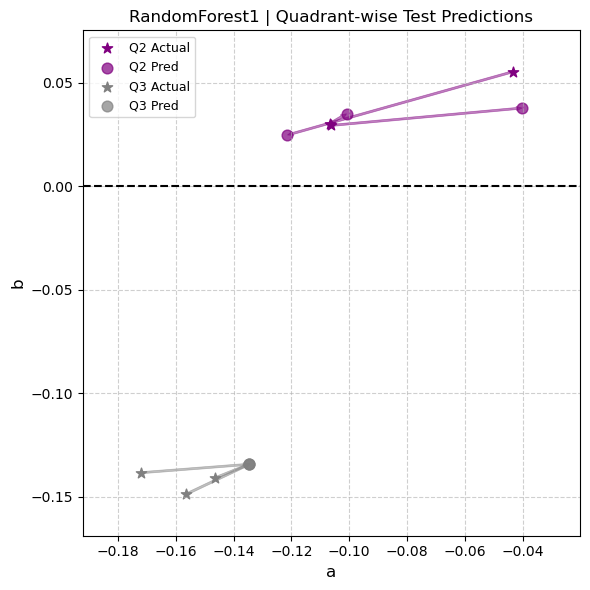

Training and evaluating model: RandomForest2 (single model, no quadrant split)


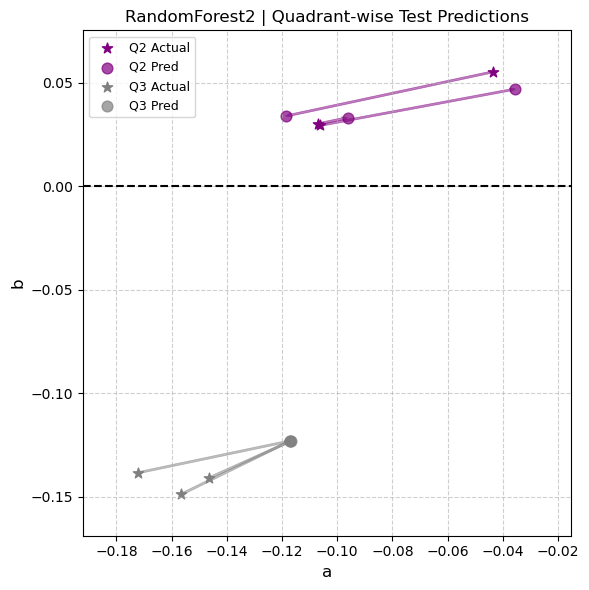

Training and evaluating model: RandomForest3 (single model, no quadrant split)


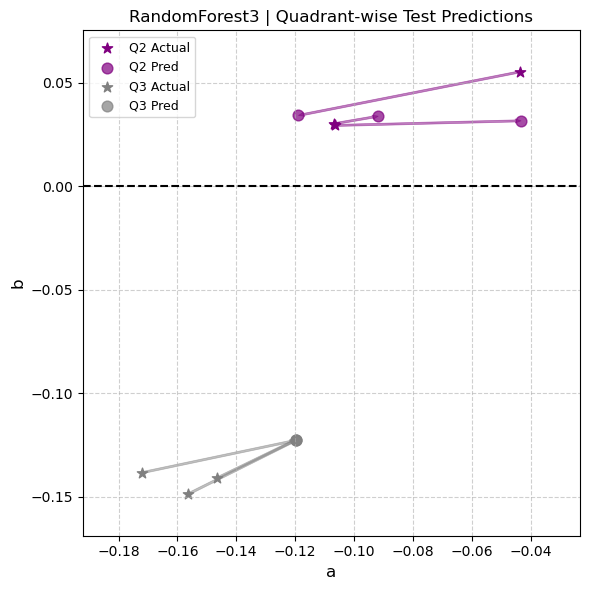

Training and evaluating model: XGBoost (single model, no quadrant split)


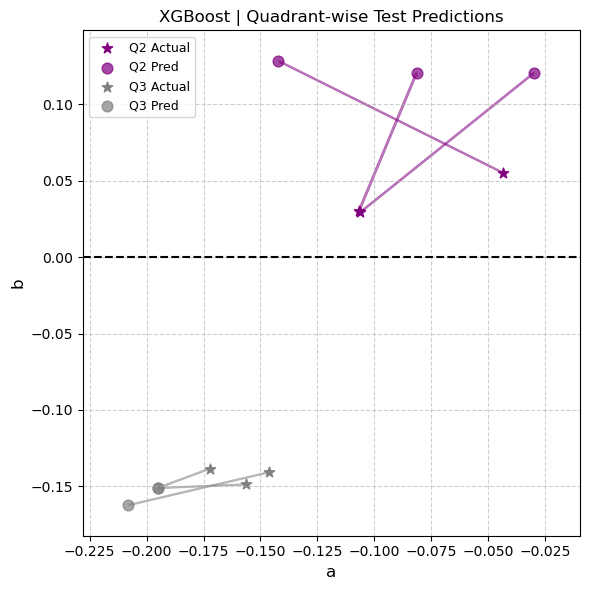

Training and evaluating model: XGBoost1 (single model, no quadrant split)


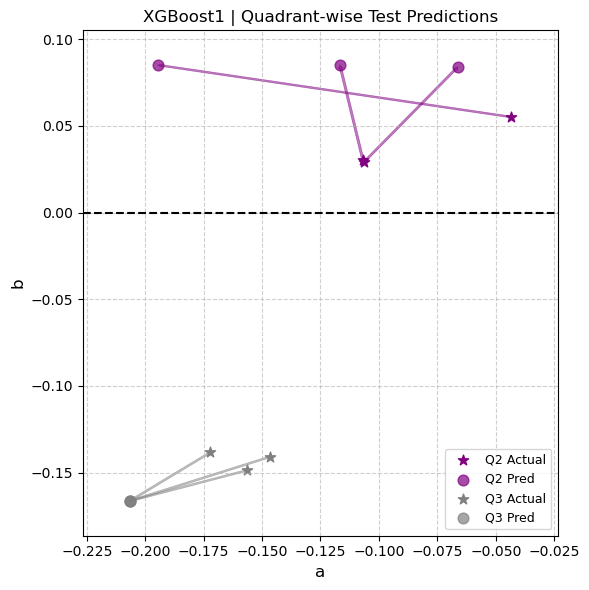

Training and evaluating model: GradientBoost (single model, no quadrant split)


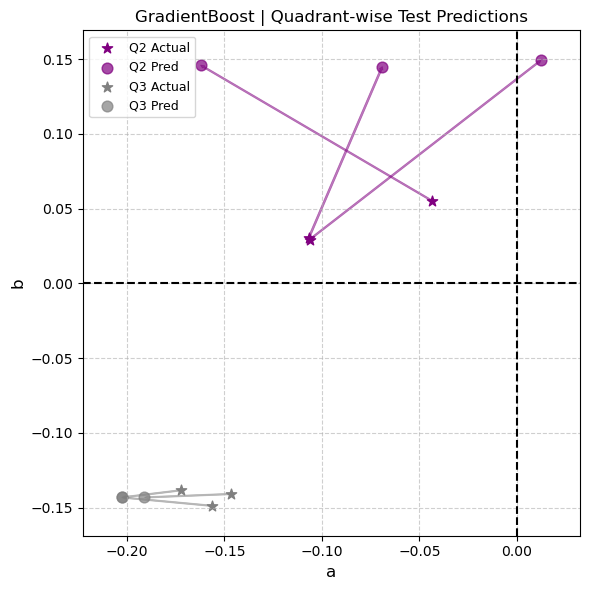

Training and evaluating model: GradientBoost1 (single model, no quadrant split)


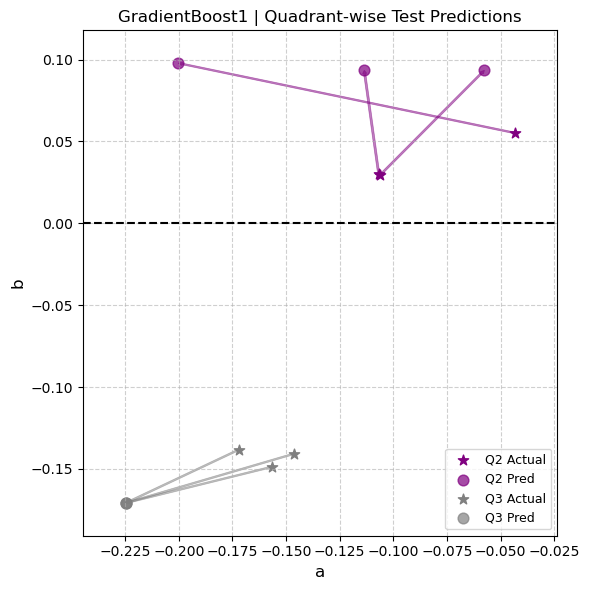

Training and evaluating model: RandomForest_Tuned (single model, no quadrant split)


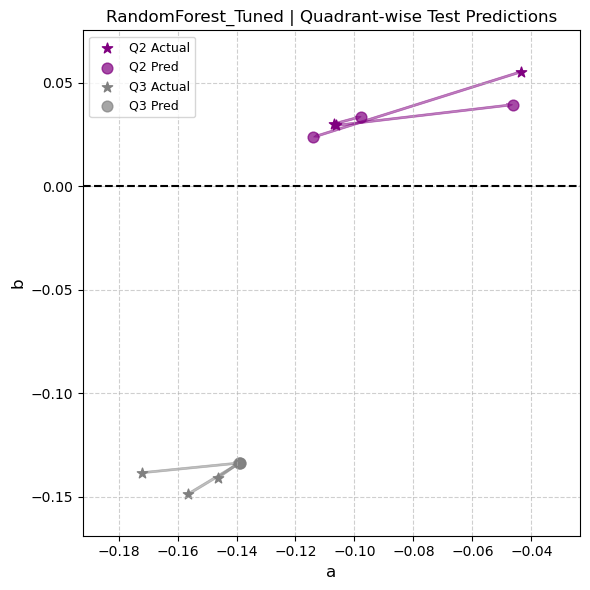

Training and evaluating model: XGBoost_Tuned (single model, no quadrant split)


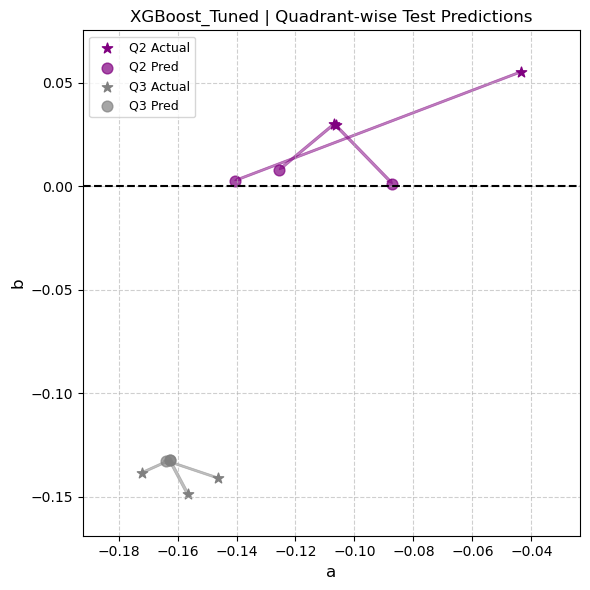

Training and evaluating model: XGBoost_Improved (single model, no quadrant split)


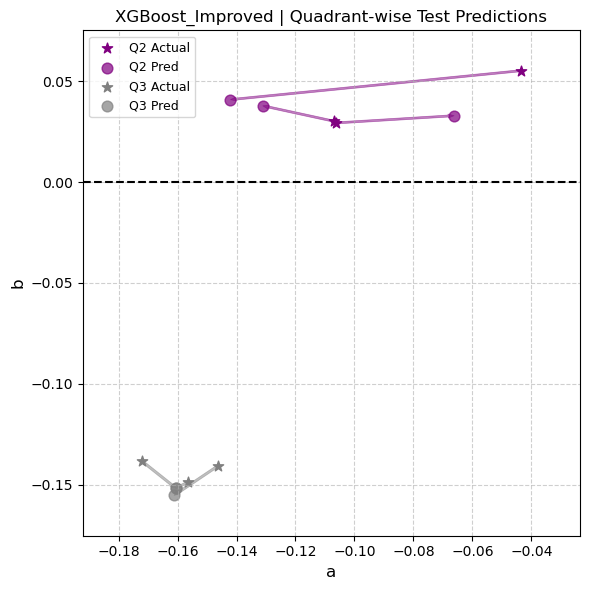

Training and evaluating model: CatBoost_Tuned (single model, no quadrant split)


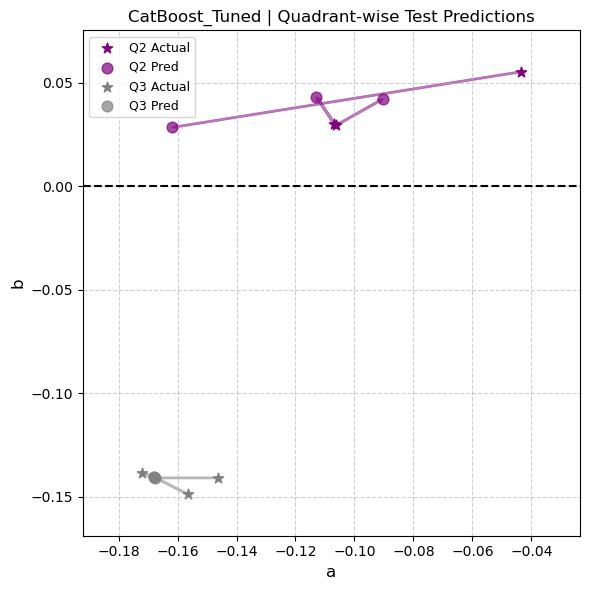

Training and evaluating model: CatBoost_Improved (single model, no quadrant split)


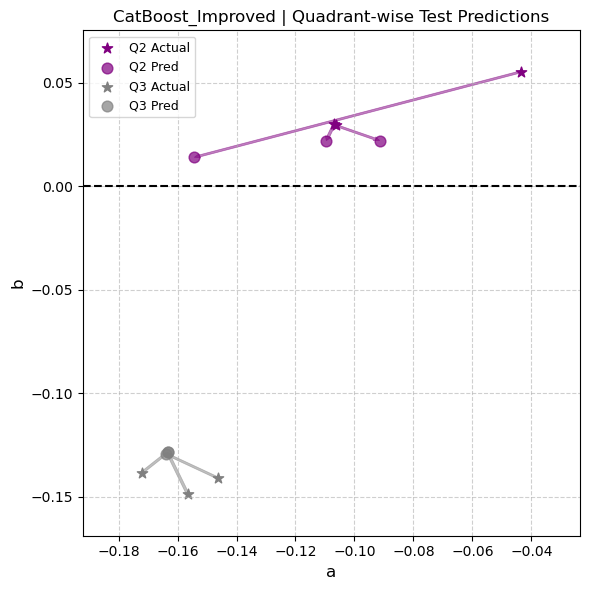

Training and evaluating model: GradientBoost_Tuned (single model, no quadrant split)


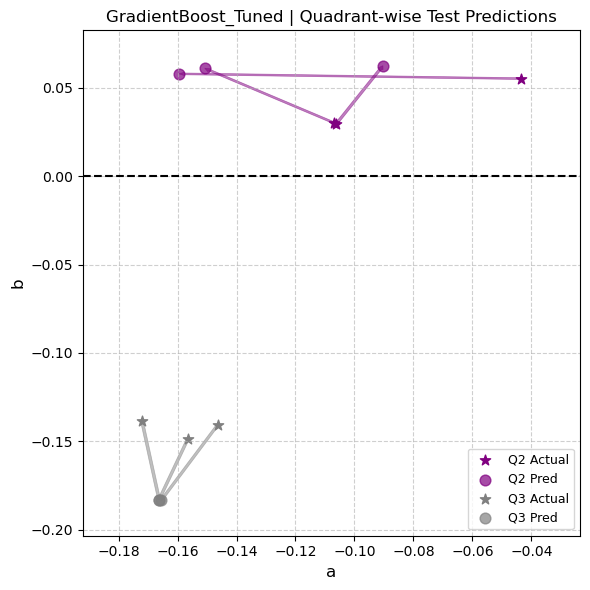

Training and evaluating model: Lasso_Tuned (single model, no quadrant split)


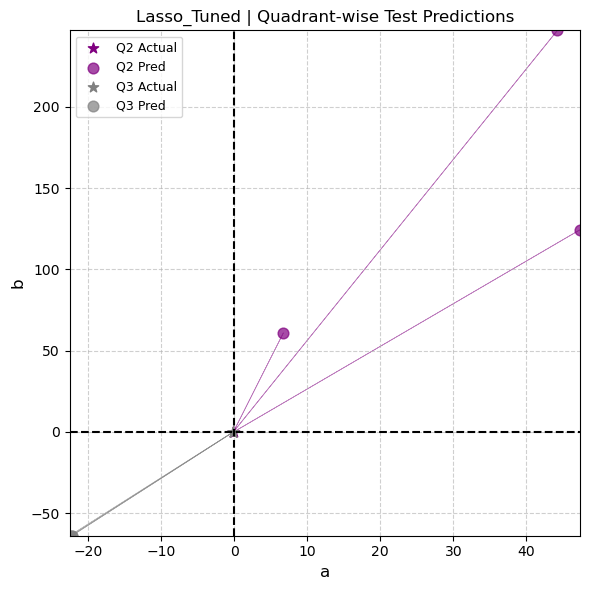

Training and evaluating model: Ridge_Tuned (single model, no quadrant split)


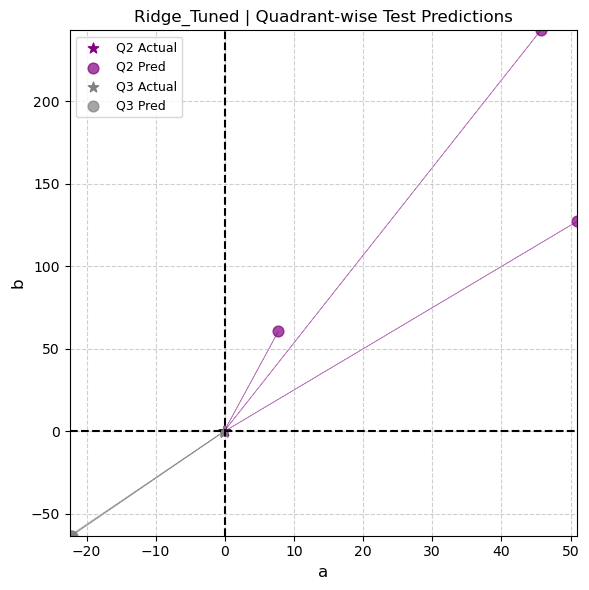

             Model Quadrant Target       Split         MAE           MSE  \
0    RandomForest1      All      a       Train    0.022384      0.000830   
1    RandomForest1      All      a  Validation    0.044915      0.003629   
2    RandomForest1      All      b       Train    0.018953      0.000648   
3    RandomForest1      All      b  Validation    0.036071      0.002314   
4    RandomForest1        2      a        Test    0.049931      0.003488   
..             ...      ...    ...         ...         ...           ...   
115    Ridge_Tuned      All      b  Validation    0.040100      0.002774   
116    Ridge_Tuned        2      a        Test   34.877758   1586.048478   
117    Ridge_Tuned        2      b        Test  143.521388  26269.272319   
118    Ridge_Tuned        3      a        Test   22.076932    487.405518   
119    Ridge_Tuned        3      b        Test   62.967979   3964.967813   

               R2          Bias  
0    8.942139e-01 -2.458269e-18  
1    5.912000e-01  

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import clone
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt






df_selected= final_lagged_df
# === 1. Setup: targets and features ===
target_columns = ['a', 'b']
features_removed = [
    'Sodium Sulfate', 'Humidity of the blend', 'Cobalt Oxide', 'K3',
    'Furnace Floor Temperatures 6', 'K2', 'Furnace Floor Temperatures 3',
    'Furnace Floor Temperatures 10', 'K1', 'Internal Pressure Value',
    'Furnace Floor Temperatures 5'
]

# === 2. Assign quadrants ===
def assign_quadrant(a, b):
    if a >= 0 and b >= 0:
        return 1
    elif a < 0 and b >= 0:
        return 2
    elif a < 0 and b < 0:
        return 3
    else:
        return 4

y_full = df_selected[target_columns].copy()
y_full['quadrant'] = y_full.apply(lambda row: assign_quadrant(row['a'], row['b']), axis=1)

# === 3. Split test set indices (last 6 samples per quadrant) ===
test_indices = []
for q in [2, 3]:
    q_indices = y_full[y_full['quadrant'] == q].index
    q_test_indices = q_indices[-67:-64]
    test_indices.extend(q_test_indices)

train_val_indices = df_selected.index.difference(test_indices)

# === 4. Prepare features ===
X_all = df_selected.drop(columns=target_columns + features_removed)

# === 5. Scale features and targets ===
scaler_X = RobustScaler()
scaler_y = RobustScaler()

scaler_X.fit(X_all.loc[train_val_indices])
X_train_val_scaled = pd.DataFrame(scaler_X.transform(X_all.loc[train_val_indices]), columns=X_all.columns, index=train_val_indices)
X_test_scaled = pd.DataFrame(scaler_X.transform(X_all.loc[test_indices]), columns=X_all.columns, index=test_indices)

scaler_y.fit(y_full.loc[train_val_indices, target_columns])
y_train_val_scaled = pd.DataFrame(scaler_y.transform(y_full.loc[train_val_indices, target_columns]), columns=target_columns, index=train_val_indices)
y_test_scaled = pd.DataFrame(scaler_y.transform(y_full.loc[test_indices, target_columns]), columns=target_columns, index=test_indices)

# === 6. Outlier correction ===
def mad(series):
    return np.median(np.abs(series - np.median(series)))

thresholds = {1: 2.5, 2: 2.5, 3: 3.5, 4: 3.5}
outlier_log = {quad: {} for quad in thresholds.keys()}

corrected_X_train_val = X_train_val_scaled.copy()

for quad, threshold in thresholds.items():
    quad_indices = y_full.loc[train_val_indices][y_full.loc[train_val_indices]['quadrant'] == quad].index
    for col in X_train_val_scaled.columns:
        col_data = X_train_val_scaled.loc[quad_indices, col]
        col_median = np.median(col_data)
        col_mad = mad(col_data)
        if col_mad == 0:
            outlier_log[quad][col] = 0
            continue
        z_scores = np.abs((col_data - col_median) / col_mad)
        outlier_indices = col_data[z_scores > threshold].index
        corrected_X_train_val.loc[outlier_indices, col] = col_median
        outlier_log[quad][col] = len(outlier_indices)

# === 7. Train/Val Split ===
quadrants_train_val = y_full.loc[train_val_indices, 'quadrant'].reset_index(drop=True)

X_train, X_val, y_train, y_val, q_train, q_val = train_test_split(
    corrected_X_train_val, y_train_val_scaled, quadrants_train_val, test_size=0.2, random_state=42, stratify=quadrants_train_val
)


# === 11. Create quadrant-specific test sets (from safely scaled test set) ===
quadrant_test_sets = {}
for q in [ 2, 3]:
    q_test_indices = y_full.loc[test_indices][y_full.loc[test_indices]['quadrant'] == q].index
    quadrant_test_sets[q] = (X_test_scaled.loc[q_test_indices], y_full.loc[q_test_indices, target_columns])


# === 8. Classifier prediction for quadrants (assumed pre-fitted classifier) ===



from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(random_state=42, n_estimators=200)

clf.fit(X_train, q_train)
q_train_pred = q_train.values
#q_train_pred = clf.predict(X_train)
q_val_pred = clf.predict(X_val)

from sklearn.metrics import accuracy_score, confusion_matrix

train_acc = accuracy_score(q_train, q_train_pred)
val_acc = accuracy_score(q_val, q_val_pred)

print(f"Classifier accuracy on Train: {train_acc:.3f}")
print(f"Classifier accuracy on Validation: {val_acc:.3f}")

# Optional: View confusion matrix for validation predictions
print("Confusion Matrix (Validation):")
print(confusion_matrix(q_val, q_val_pred))



# --- 7. Add quadrant prediction as feature with importance factor ---
#importance_factor = 5


# 7. Add predicted quadrant as feature for train and val sets

X_train_quad_scaled = np.hstack([X_train, q_train_pred.reshape(-1, 1) ])
X_val_quad_scaled = np.hstack([X_val, q_val_pred.reshape(-1, 1) ])



# --- 9. Regression training and evaluation per quadrant ---
results_per_quadrant = []
# --- Prepare full test set by combining all quadrant test sets ---
X_test_all = pd.concat([quadrant_test_sets[q][0] for q in [2, 3]])
y_test_all = pd.concat([quadrant_test_sets[q][1] for q in [ 2, 3]])

# Scale the full test set features (without the quadrant feature yet)
X_test_all_scaled = scaler_X.transform(X_test_all)

# Predict quadrant labels for full test set
q_test_pred_all = clf.predict(X_test_all_scaled)

# Add predicted quadrant as an extra feature for test set
X_test_all_quad_scaled = np.hstack([X_test_all_scaled, q_test_pred_all.reshape(-1, 1)])

quadrants_test_true = y_full.loc[X_test_all.index, 'quadrant']

test_acc = accuracy_score(quadrants_test_true,q_test_pred_all)
print(f"Classifier accuracy on Test: {test_acc:.3f}")

print("\nTest Predictions Distribution:", pd.Series(q_test_pred_all).value_counts().sort_index())
print("Test True Distribution:", pd.Series(quadrants_test_true).value_counts().sort_index())

from sklearn.metrics import classification_report

print("Classification Report (Test):")
print(classification_report(quadrants_test_true, q_test_pred_all, digits=3))


q_test_pred_all = clf.predict(X_test_scaled)

# === 9. Quadrant-wise Regression Loop ===
results_per_quadrant = []



for model_name, model_base in models.items():
    print(f"Training and evaluating model: {model_name} (single model, no quadrant split)")
    
    model = model_base
    
    if 'sample_weight' in model.fit.__code__.co_varnames:
        model.fit(X_train_quad_scaled, y_train, sample_weight=None)
    else:
        model.fit(X_train_quad_scaled, y_train)
    
    # Predict on entire train and validation sets
    y_train_pred_scaled = model.predict(X_train_quad_scaled)
    y_val_pred_scaled = model.predict(X_val_quad_scaled)
    
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
    y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)
    y_train_true = scaler_y.inverse_transform(y_train)
    y_val_true = scaler_y.inverse_transform(y_val)

    # Compute overall train and validation metrics (not by quadrant)
    for i, target in enumerate(target_columns):
        mae = mean_absolute_error(y_train_true[:, i], y_train_pred[:, i])
        mse = mean_squared_error(y_train_true[:, i], y_train_pred[:, i])
        r2 = r2_score(y_train_true[:, i], y_train_pred[:, i])
        bias = (y_train_pred[:, i] - y_train_true[:, i]).mean()

        results_per_quadrant.append({
            'Model': model_name,
            'Quadrant': 'All',
            'Target': target,
            'Split': 'Train',
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'Bias': bias
        })

        mae = mean_absolute_error(y_val_true[:, i], y_val_pred[:, i])
        mse = mean_squared_error(y_val_true[:, i], y_val_pred[:, i])
        r2 = r2_score(y_val_true[:, i], y_val_pred[:, i])
        bias = (y_val_pred[:, i] - y_val_true[:, i]).mean()

        results_per_quadrant.append({
            'Model': model_name,
            'Quadrant': 'All',
            'Target': target,
            'Split': 'Validation',
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'Bias': bias
        })

    # --- Now use classifier labels to group test samples ---
# --- Now use classifier labels to group test samples ---
    predictions_per_quadrant = {}
    
    for q in [1, 2, 3,4]:
        idx_test_q = np.where(q_test_pred_all == q)[0]
    
        if len(idx_test_q) == 0:
            #print(f"Warning: No test samples predicted in quadrant {q}, skipping test prediction for this quadrant.")
            continue
    
        X_test_q = X_test_all_quad_scaled[idx_test_q]
        y_test_true = y_test_all.iloc[idx_test_q].values
    
        # Predict on test samples (using single model)
        y_test_pred_scaled = model.predict(X_test_q)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
    
        # Save predictions
        predictions_per_quadrant[q] = (y_test_true, y_test_pred)
    
        # Compute test metrics for this quadrant grouping
        for i, target in enumerate(target_columns):
            mae = mean_absolute_error(y_test_true[:, i], y_test_pred[:, i])
            mse = mean_squared_error(y_test_true[:, i], y_test_pred[:, i])
            r2 = r2_score(y_test_true[:, i], y_test_pred[:, i])
            bias = (y_test_pred[:, i] - y_test_true[:, i]).mean()
    
            results_per_quadrant.append({
                'Model': model_name,
                'Quadrant': q,
                'Target': target,
                'Split': 'Test',
                'MAE': mae,
                'MSE': mse,
                'R2': r2,
                'Bias': bias
            })
    
    # Plot test predictions per quadrant for this model
    colors = {
    1: (0 / 255, 0 / 255, 255 / 255),
    2: (128 / 255, 0 / 255, 128 / 255),
    3: (128 / 255, 128 / 255, 128 / 255),
    4: (165 / 255, 42 / 255, 42 / 255)
    }
    
    plt.figure(figsize=(6, 6))  # Smaller, tidier plot
    
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=1.5)
    
    # For adjusting axis limits later
    all_a = []
    all_b = []
    
    for q_label, (y_true_q, y_pred_q) in predictions_per_quadrant.items():
        plt.scatter(y_true_q[:, 0], y_true_q[:, 1], color=colors[q_label], marker='*', s=60, label=f'Q{q_label} Actual')
        plt.scatter(y_pred_q[:, 0], y_pred_q[:, 1], color=colors[q_label], marker='o', s=60, alpha=0.7, label=f'Q{q_label} Pred')
        
        for i in range(len(y_true_q)):
            plt.arrow(
                y_true_q[i, 0], y_true_q[i, 1],
                y_pred_q[i, 0] - y_true_q[i, 0],
                y_pred_q[i, 1] - y_true_q[i, 1],
                head_width=0.002, head_length=0.002,  # smaller arrowhead
                fc=colors[q_label], ec=colors[q_label], alpha=0.5,
                linewidth=0.5,  # thinner arrows
                length_includes_head=True
            )
        
        # Collect all points for axis limits
        all_a.extend(y_true_q[:, 0])
        all_a.extend(y_pred_q[:, 0])
        all_b.extend(y_true_q[:, 1])
        all_b.extend(y_pred_q[:, 1])
    
    # Set axis limits with small padding
    padding = 0.02
    plt.xlim(min(all_a) - padding, max(all_a) + padding)
    plt.ylim(min(all_b) - padding, max(all_b) + padding)
    
    plt.xlabel('a', fontsize=12)
    plt.ylabel('b', fontsize=12)
    plt.title(f'{model_name} | Quadrant-wise Test Predictions')
    plt.legend(fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame(results_per_quadrant)
print(results_df)